In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

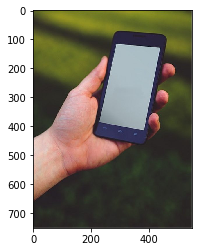

In [35]:
image = cv2.imread('images/phone.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(image)

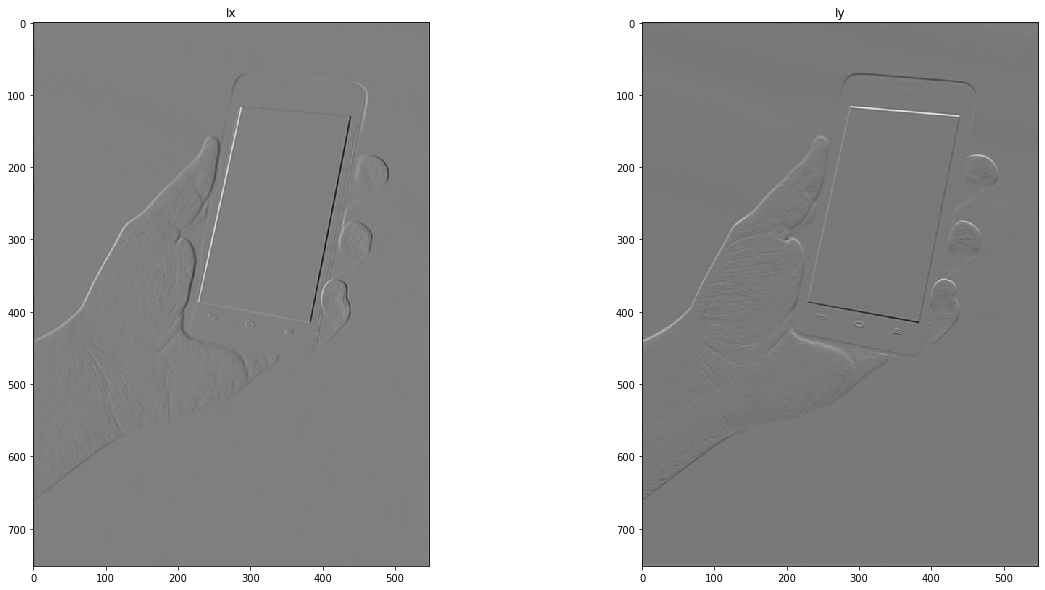

In [11]:
# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D


dx = cv2.filter2D(gray_img, cv2.CV_32F, sobel_x)  
dy = cv2.filter2D(gray_img, cv2.CV_32F, sobel_y)  

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Ix')
ax1.imshow(dx, cmap='gray')

ax2.set_title('Iy')
ax2.imshow(dy, cmap='gray')

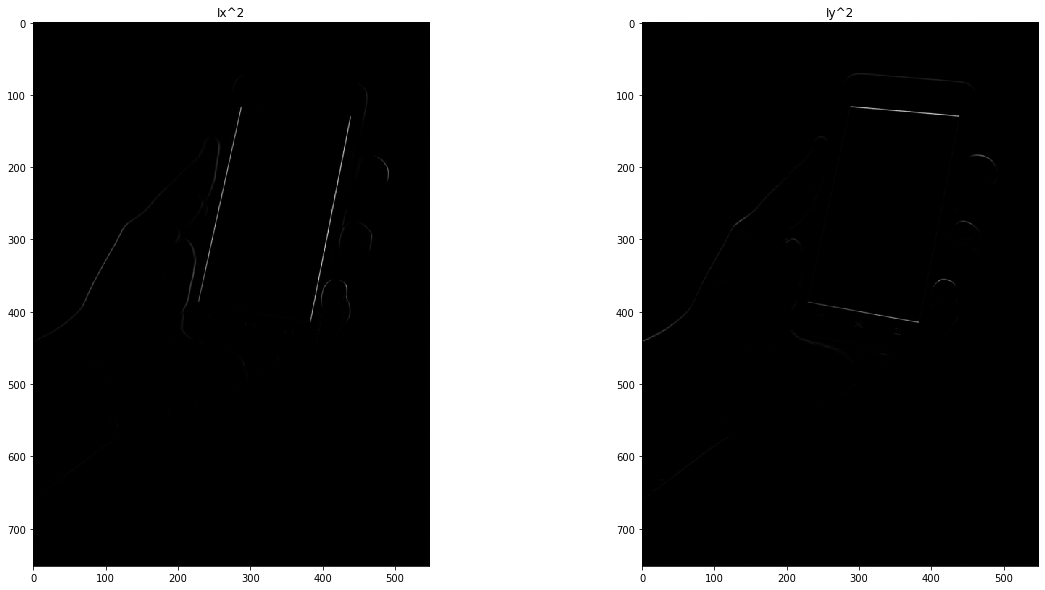

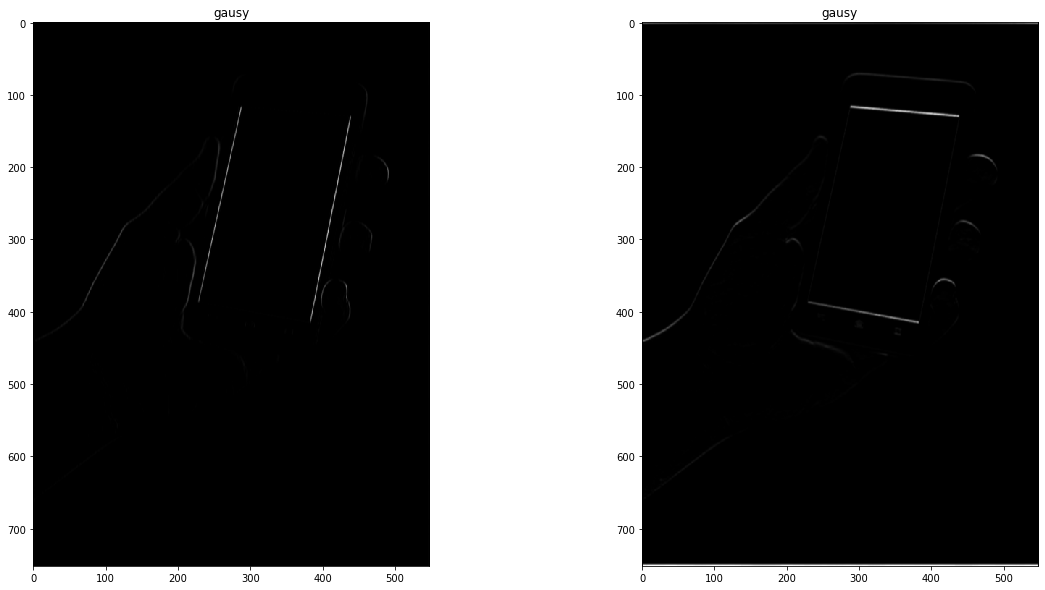

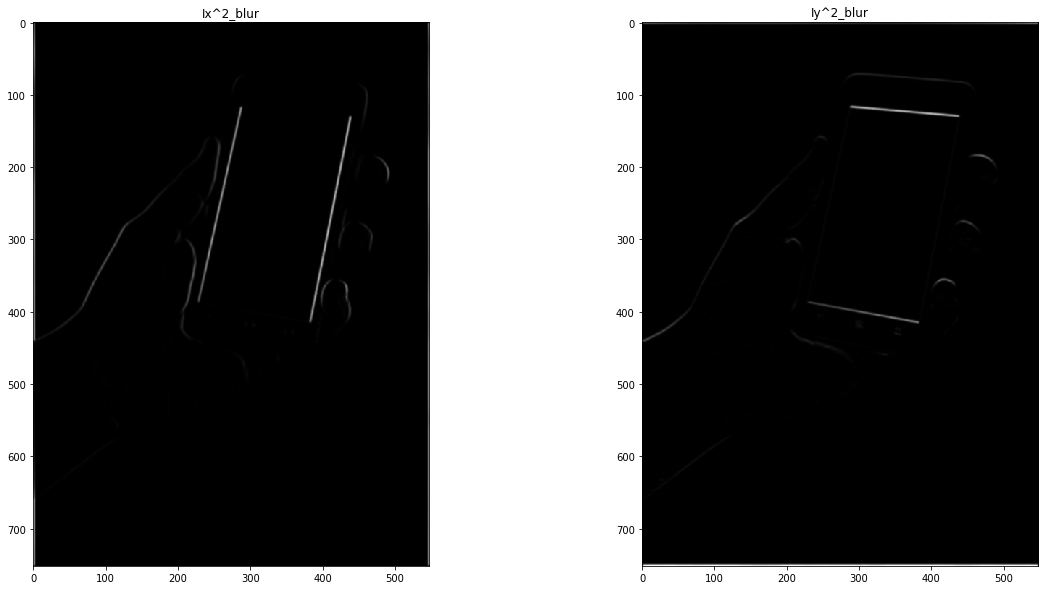

In [30]:
Ix2 = dx*dx
Iy2 = dy*dy


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Ix^2')
ax1.imshow(Ix2, cmap='gray')

ax2.set_title('Iy^2')
ax2.imshow(Iy2, cmap='gray')


kernel =cv2.getGaussianKernel(5,1)


gausx = cv2.filter2D(Ix2,-1,kernel)
gausy = cv2.filter2D(Iy2,-1,kernel)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('gausy')
ax1.imshow(gausx, cmap='gray')

ax2.set_title('gausy')
ax2.imshow(gausy, cmap='gray')






Ix2_blur = cv2.GaussianBlur(Ix2, (5,5), 0)
Iy2_blur = cv2.GaussianBlur(Iy2, (5,5), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Ix^2_blur')
ax1.imshow(Ix2_blur, cmap='gray')

ax2.set_title('Iy^2_blur')
ax2.imshow(Iy2_blur, cmap='gray')

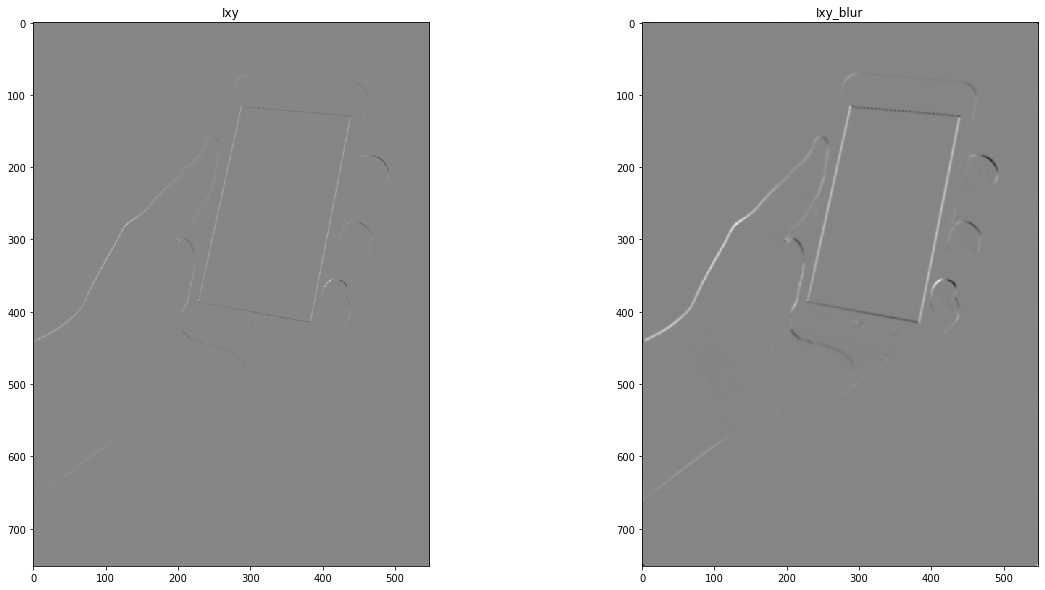

In [26]:
Ixy = dx*dy
Ixy_blur = cv2.GaussianBlur(Ixy, (5,5), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Ixy')
ax1.imshow(Ixy, cmap='gray')

ax2.set_title('Ixy_blur')
ax2.imshow(Ixy_blur, cmap='gray')

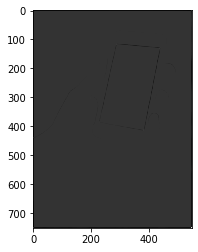

In [32]:
trace = (Ix2_blur + Iy2_blur) * (Ix2_blur + Iy2_blur)

output = (Ix2_blur*Iy2_blur) - (Ixy_blur * Ixy_blur) - 0.04*trace

plt.imshow(output, cmap='gray')